# Feature Engineering

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [12]:
#read the dataset
train = pd.read_csv("../../data/training_values.csv")
target = pd.read_csv("../../data/training_labels.csv")

In [13]:
#
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [14]:
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [15]:
water_df = target.merge(train, left_on ='id', right_on ='id')
water_df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [16]:
water_df.index = water_df['id']


In [17]:
water_df = water_df.drop('id',axis =1)
water_df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [18]:
#binary encoding our target columns
status_group_new = {'functional':1,'non functional':0, 'functional needs repair': 0}
water_df['status_group'] = water_df['status_group'].replace(status_group_new)

In [19]:
water_df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,1,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,1,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,1,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [20]:
water_df = water_df.drop(['installer', 'num_private','waterpoint_type_group','recorded_by','payment_type','management_group','quantity_group','scheme_management','ward'], axis =1)
water_df

,status_group,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,basin,subvillage,...,extraction_type_class,management,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
69572,1,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,gravity,vwc,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe
8776,1,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
34310,1,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,gravity,vwc,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple
67743,0,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple
19728,1,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,1,10.0,2013-05-03,Germany Republi,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,gravity,water board,pay per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe
27263,1,4700.0,2011-05-07,Cefa-njombe,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,gravity,vwc,pay annually,soft,good,enough,river,river/lake,surface,communal standpipe
37057,1,0.0,2011-04-11,NaN,0,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,handpump,vwc,pay monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump


In [21]:
X = water_df.drop(['status_group'], axis =1)
y = water_df['status_group']

X.shape, y.shape

((59400, 30), (59400,))

In [22]:
y.value_counts(normalize=True)

1    0.543081
0    0.456919
Name: status_group, dtype: float64

Looking at the value counts of our target you will see that the class is balanced. Functional is at 54% and non Functional is 46%.

In [23]:
#holdout set
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.10,random_state=42)

#test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20,random_state=42)

In [24]:
num_cols = []
ohe_cols = []
freq_cols =[]

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
    elif X[col].nunique() < 10:
        ohe_cols.append(col)
    else:
        freq_cols.append(col)

In [25]:
#print the list of numerical columns,categorical columns and frequency columns
print(f"list of numerical columns: {num_cols}")
print("--")
print(f"list of categorical columns:{ohe_cols}")
print("--")
print(f"list of Frequency columns:{freq_cols}")

list of numerical columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']
--
list of categorical columns:['basin', 'public_meeting', 'permit', 'extraction_type_class', 'payment', 'water_quality', 'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type']
--
list of Frequency columns:['date_recorded', 'funder', 'wpt_name', 'subvillage', 'region', 'lga', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'source']


In [26]:
#Using pipeline to preprocess our data
#steps
# scale the numerical columns
# for the categorical and frequency columns,
#use the imputer to fill value for null, then oneHotEncode the column

num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value= 0,)),
    ('oh_encoder', OneHotEncoder(drop='first',handle_unknown= 'error'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value= np.nan))
])


# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'region_code', 'district_code',
                                  'population', 'construction_year']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['basin', 'public_mee...
                                  'waterpoint_type']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                     

In [27]:
dec_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


cross_validate(dec_tree, X_train, y_train, return_train_score=True)

{'fit_time': array([0.86184597, 0.8754921 , 0.86707497, 0.86990333, 0.86342788]),
 'score_time': array([0.1091609 , 0.08098984, 0.08112478, 0.10929298, 0.080446  ]),
 'test_score': array([0.77063362, 0.76093056, 0.76104746, 0.76441015, 0.77025605]),
 'train_score': array([0.99915239, 0.99921085, 0.99909394, 0.99906474, 0.99909396])}

The accuracy score shows that the model is overfitting, will go ahead and use the Gridsearch to tune the tree for best parameter.

In [28]:
param = [{ 
    'classifier__criterion':['entropy'],
    'classifier__max_depth': [3,10,15],
    'classifier__min_samples_split':[5,20,100],
    'classifier__class_weight':['balanced']}]

grid = GridSearchCV(estimator = dec_tree,
                    param_grid = param, scoring='f1')

output = grid.fit(X_train,y_train)

output.best_score_

0.7930542743600059

In [30]:
output.best_estimator_.fit(X_train,y_train)
preds_tr_best = output.best_estimator_.predict(X_train)
preds_te_best = output.best_estimator_.predict(X_test)

#Print the metrics to compare with other models
print("Training:")
print(f"Precision score: {precision_score(y_train,preds_tr_best)}")
print(f"Recall score: {recall_score(y_train,preds_tr_best)}")
print(f"F1 score: {f1_score(y_train,preds_tr_best)}")

print("---------------")

print("Test:")
print(f"Precision score: {precision_score(y_test,preds_te_best)}")
print(f"Recall score: {recall_score(y_test,preds_te_best)}")
print(f"F1 score: {f1_score(y_test,preds_te_best)}")

Training:
Precision score: 0.8359024153416676
Recall score: 0.8862817433081674
F1 score: 0.8603552020654188
---------------
Test:
Precision score: 0.7721231766612642
Recall score: 0.8285217391304348
F1 score: 0.7993288590604029


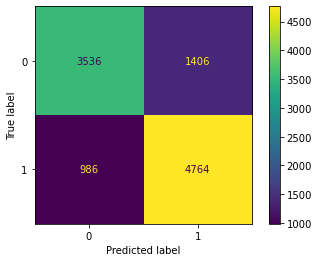

In [31]:
plot_confusion_matrix(output.best_estimator_,X_test,y_test)